# Detailed Mech Simulation

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Image
%matplotlib inline

In [2]:
from rmgpy.chemkin import *
from rmgpy.species import Species

In [3]:
from afm.canteraModel import Cantera

/home/yentingw/RMG/RMG-Py/rmgpy/tools/plot.py:34: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/yentingw/anaconda2/envs/afm_env/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/yentingw/anaconda2/envs/afm_env/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/yentingw/anaconda2/envs/afm_env/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yentingw/anaconda2/envs/afm_env/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yentingw/anaconda2/envs/afm_env/lib/pyth

# 1. specify condition and simulate

In [4]:
model = 'heptane'

working_dir = os.path.join('/home/yentingw/AutoFragmentModeling', 'examples', model, 'results', 'detailed')
chemkin_path = os.path.join(working_dir, 'chem_annotated.inp')
species_dict_path = os.path.join(working_dir, 'species_dictionary.txt')

In [5]:
results_path = os.path.join(working_dir, 'results_Cantera_outcome')
if not os.path.exists(results_path):
    os.mkdir(results_path)

In [6]:
speciesList, reactionList = loadChemkinFile(chemkin_path,
                                            species_dict_path)

In [7]:
speciesDict = {}
for spe in speciesList:
    speciesDict[spe.toChemkin()] = spe

In [8]:
# Find the species: ArCCCCR, RCCCCR, RC
hep = speciesDict['C7H16(1)']
reactorTypeList = ['IdealGasConstPressureTemperatureReactor']
molFracList=[{hep: 1}]
Tlist = ([1600],'K')
Plist = ([20],'bar')
reactionTimeList = ([2.71e-6], 's')

In [9]:
job = Cantera(speciesList=speciesList, reactionList=reactionList, outputDirectory='temp_detailed')
job.loadModel()
job.generateConditions(reactorTypeList, reactionTimeList, molFracList, Tlist, Plist)
alldata = job.simulate()

# 2. reactant conversion

In [10]:
# prepare moles data
time, dataList, reactionSensitivityData = alldata[0]
TData = dataList[0]
PData = dataList[1] # unit : Pa
VData = dataList[2]
total_moles = PData.data*VData.data/8.314/TData.data

In [11]:
VData.data

array([ 1.        ,  1.        ,  1.        ,  1.00000001,  1.00000001,
        1.00000001,  1.00000002,  1.00000003,  1.00000006,  1.00000009,
        1.00000016,  1.00000023,  1.0000003 ,  1.00000042,  1.00000053,
        1.00000064,  1.00000076,  1.00000097,  1.00000119,  1.00000157,
        1.00000195,  1.00000234,  1.00000272,  1.00000311,  1.00000372,
        1.00000433,  1.00000495,  1.00000558,  1.0000062 ,  1.00000683,
        1.00000828,  1.00000934,  1.00001041,  1.00001149,  1.00001258,
        1.00001368,  1.00001479,  1.0000159 ,  1.00001703,  1.00001817,
        1.00001932,  1.00002121,  1.00002429,  1.00002662,  1.00002898,
        1.00003137,  1.0000338 ,  1.00003626,  1.00003876,  1.00004129,
        1.00004386,  1.00004646,  1.0000491 ,  1.00005176,  1.00005447,
        1.0000572 ,  1.00005997,  1.00006277,  1.0000656 ,  1.00006847,
        1.00007136,  1.00007429,  1.00007726,  1.00008025,  1.00008328,
        1.00008633,  1.00008942,  1.00009254,  1.00009569,  1.00

In [12]:
total_moles

array([ 150.34880924,  150.34880939,  150.34880988,  150.34881037,
        150.34881086,  150.34881135,  150.34881238,  150.34881425,
        150.34881758,  150.34882351,  150.34883388,  150.34884425,
        150.34885464,  150.34887164,  150.34888866,  150.34890571,
        150.34892277,  150.34895565,  150.3489886 ,  150.34904571,
        150.34910305,  150.34916063,  150.34921843,  150.34927647,
        150.34936843,  150.34946095,  150.34955405,  150.34964772,
        150.34974195,  150.34983676,  150.35005441,  150.35021361,
        150.35037432,  150.35053655,  150.35070027,  150.35086549,
        150.3510322 ,  150.35120039,  150.35137005,  150.35154119,
        150.3517138 ,  150.35199796,  150.35246173,  150.35281104,
        150.35316568,  150.35352562,  150.35389082,  150.35426124,
        150.35463686,  150.35501765,  150.35540357,  150.3557946 ,
        150.3561907 ,  150.35659184,  150.35699801,  150.35740916,
        150.35782527,  150.35824632,  150.35867228,  150.35910

In [13]:
dataList[7].data

array([ 1.        ,  1.        ,  0.99999999,  0.99999998,  0.99999998,
        0.99999997,  0.99999996,  0.99999993,  0.99999989,  0.99999981,
        0.99999967,  0.99999953,  0.9999994 ,  0.99999917,  0.99999894,
        0.99999872,  0.99999849,  0.99999806,  0.99999762,  0.99999687,
        0.99999611,  0.99999535,  0.9999946 ,  0.99999384,  0.99999263,
        0.99999143,  0.99999022,  0.999989  ,  0.99998779,  0.99998656,
        0.99998377,  0.99998174,  0.9999797 ,  0.99997764,  0.99997558,
        0.9999735 ,  0.99997142,  0.99996932,  0.99996721,  0.99996509,
        0.99996297,  0.99995948,  0.99995382,  0.99994959,  0.99994532,
        0.99994101,  0.99993667,  0.99993228,  0.99992785,  0.99992338,
        0.99991887,  0.99991433,  0.99990974,  0.99990511,  0.99990045,
        0.99989575,  0.999891  ,  0.99988622,  0.9998814 ,  0.99987654,
        0.99987164,  0.99986671,  0.99986173,  0.99985672,  0.99985166,
        0.99984657,  0.99984145,  0.99983628,  0.99983108,  0.99

In [14]:
hep_mf = dataList[7].data
print dataList[7].label
hep_moles = hep_mf*total_moles
hep_conv = (hep_moles[0]-hep_moles)/hep_moles[0]

C7H16(1)


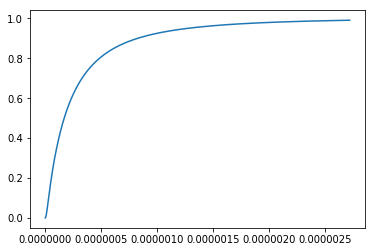

In [15]:
plt.plot(time.data, hep_conv)
numpy.savetxt(os.path.join(results_path, 'reactant_conv.csv'), (time.data, hep_conv))

# 3. molecular weight distribution

In [16]:
molecular_weight_distri = []
for mf in dataList[3:]:
    spe = speciesDict[mf.label]
    molecular_weight_distri.append((spe.molecule[0].getMolecularWeight(), mf.data[-1]))

In [17]:
mws = [tup[0]*1000 for tup in molecular_weight_distri]
molefracs = [tup[1] for tup in molecular_weight_distri]

In [18]:
molefracs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0023183442549377822,
 7.0937052749744833e-07,
 3.3186218654806352e-06,
 1.5883307391046558e-07,
 0.00015923909104079565,
 4.1365203161833918e-08,
 2.3753591779270814e-05,
 3.057136820314122e-08,
 1.2401464836493955e-07,
 0.00059156242068869591,
 1.0217525454235302e-07,
 3.2554946312506717e-08,
 0.00014456753689602296,
 0.37562434107671083,
 0.13906702925907288,
 0.025255122790511841,
 0.0008847241011664534,
 0.0064757054265288322,
 0.012162860517355802,
 0.088019159210935741,
 3.3476821361952386e-05,
 0.21714212981444286,
 1.9200767536659156e-06,
 0.0018363589091683686,
 1.6469737603860393e-08,
 3.7587879765638852e-07,
 7.9567407919559317e-08,
 1.3785513047293897e-07,
 3.5534862288347795e-09,
 8.1352499315180085e-07,
 1.6700481440443526e-06,
 4.8527047827895634e-08,
 8.3351370608867632e-05,
 8.3206946066819664e-08,
 1.1594851221368432e-07,
 3.5301420809741665e-07,
 2.1393517841768152e-08,
 1.9786058158483942e-05,
 3.0995569970464222e-05,
 4.9926169495324117e-

In [19]:
numpy.savetxt(os.path.join(results_path, 'mwd.csv'), (mws, molefracs))

In [20]:
mf.label

'C8H8(1449)'